In [17]:
from sklearn.datasets import fetch_california_housing
import pandas as pd


data = fetch_california_housing()

X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X.head(n=5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [18]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X.values, y, test_size=0.2, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.2)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [20]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(30, activation="relu", input_shape=X_train.shape[1:], name='input_dense'))
model.add(Dense(30, activation="relu", name='dense_1'))
model.add(Dense(1, activation='linear', name='dense_output'))

In [21]:
model.compile(loss="mean_squared_error", optimizer='sgd')
model.summary()
print(f'Используемый оптимизатор: SGD')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_dense (Dense)         (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_output (Dense)        (None, 1)                 31        
                                                                 
Total params: 1231 (4.81 KB)
Trainable params: 1231 (4.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Используемый оптимизатор: SGD


In [22]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_valid, y_valid), verbose=False)
# mse_test = model.evaluate(X_test, y_test)

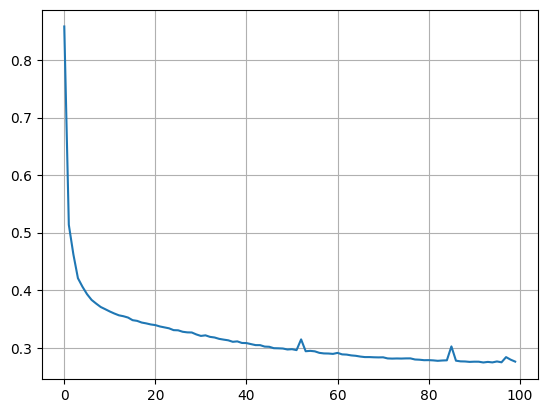

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.grid(True)
plt.show()

In [24]:
neural_loss = model.evaluate(X_test, y_test)
print(f'Критерий качества работы нейронной сети на тестовой выборке: {round(neural_loss, 4)}')

129/129 [==============================] - 0s 335us/step - loss: 0.2865
Критерий качества работы нейронной сети на тестовой выборке: 0.2865


In [37]:
X_new = X_test[:10]
Y_new = y_test[:10]
y_pred = model.predict(X_new)

for i in range(len(y_pred)):
  print(f'Предсказание: {y_pred[i]} -- Верный результат: [{Y_new[i]}]')

1/1 [==============================] - 0s 10ms/step
Предсказание: [1.7328157] -- Верный результат: [1.369]
Предсказание: [2.7375603] -- Верный результат: [2.413]
Предсказание: [1.4611981] -- Верный результат: [2.007]
Предсказание: [0.5538149] -- Верный результат: [0.725]
Предсказание: [3.3975265] -- Верный результат: [4.6]
Предсказание: [1.9494894] -- Верный результат: [1.2]
Предсказание: [2.5134974] -- Верный результат: [2.47]
Предсказание: [3.6404326] -- Верный результат: [3.369]
Предсказание: [3.0099244] -- Верный результат: [3.397]
Предсказание: [2.4011624] -- Верный результат: [2.656]
